#### Importing the required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [36]:
ip= pd.read_csv('Uber Request Data.csv')

In [37]:
ip

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [38]:
ip.shape

(6745, 6)

In [39]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### Data Cleaning

##### 1. Converting Request timestamp and Drop timestamp to same uniform format
##### 2. Replacing Null values of Drop Timestamp with Request Timestamp

In [40]:
ip["Request timestamp"] = pd.to_datetime(ip["Request timestamp"], dayfirst=True)
ip["Drop timestamp"] = pd.to_datetime(ip["Drop timestamp"], dayfirst=True)

In [43]:
ip['Drop timestamp'] = ip['Drop timestamp'].fillna(ip['Request timestamp'])

In [44]:
ip

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15 23:49:03
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15 23:50:05
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15 23:52:06
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15 23:54:39


##### Getting the column wise null count for analysis

In [46]:
ip.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp          0
dtype: int64

#### Derived Column - Time Taken

In [48]:
ip['Time Taken'] = ip['Drop timestamp']-ip['Request timestamp']
ip['Time Taken'] = round(ip['Time Taken'].dt.total_seconds()/60,1)

In [49]:
ip.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time Taken
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5


#### Derived column Time slot - to identify slots

In [53]:
def time_slot(time):
    if time in range(0,6):
        return 'Early Morning'
    if time in range(6,12):
        return 'Morning'
    if time in range(12,18):
        return 'Afternoon'
    if time in range(18,24):
        return 'Evening'
ip['Slot'] = ip['Request timestamp'].dt.hour.apply(lambda x: time_slot(x))

In [57]:
print(ip.Slot.unique())
ip.head()

['Morning' 'Afternoon' 'Evening' 'Early Morning']


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time Taken,Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5,Morning


#### Splitting Drop and Request Timestamps to Date and Time separately

In [58]:
ip['Request Date'] = ip["Request timestamp"].dt.date
ip['Request Time'] = ip["Request timestamp"].dt.time
ip['Drop Date'] = ip["Drop timestamp"].dt.date
ip['Drop Time'] = ip["Drop timestamp"].dt.time

#### Deriving 'Hour' and 'Day' from the timestamp variables

In [61]:
ip['Day'] = ip['Request timestamp'].apply(lambda x: dt.strftime(x, '%A'))
ip['Hour'] = ip['Request timestamp'].dt.hour
ip.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time Taken,Slot,Request Date,Request Time,Drop Date,Drop Time,Day,Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,Morning,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,Afternoon,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,Morning,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,Evening,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5,Morning,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [62]:
ip.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp          0
Time Taken              0
Slot                    0
Request Date            0
Request Time            0
Drop Date               0
Drop Time               0
Day                     0
Hour                    0
dtype: int64

## Data Visualization

### Plotting graph to obtain count of different types of Trip status

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


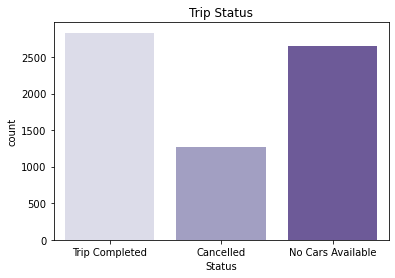

In [69]:
plt.title('Trip Status')
sns.countplot(ip['Status'], palette = 'Purples')
plt.show()

### Inference from the above plot : 
#### Count for Cancelled Status is nearly half of the count of No Cars Available

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


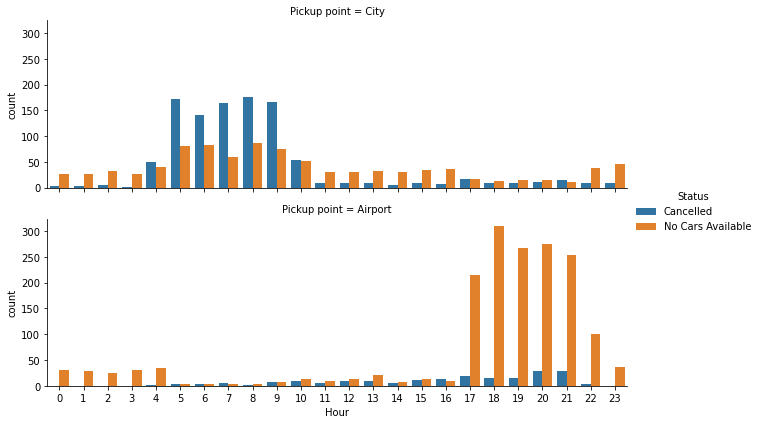

In [64]:
sns.factorplot(x = "Hour", hue = "Status", row = "Pickup point", data = ip[ip['Status']!='Trip Completed'], kind = "count", size=3, aspect=3)
plt.show()

### Inference from the above plot : 
#### 1. Issue: Cab cancellation - For City, it's facing maximum cancellation issues in the Morning (5 AM - 10 AM)
#### 2. Issue: No Cabs available - For Airport, it's facing no cabs available issues maximum in the evening (5 PM - 10 PM)
#### 3. Issue: No Cabs available - For city, however the count is comparatively less for No cabs available, still the issue lies maximum in early morning/ morning - (4 AM - 10 AM)
#### 4. On the other hand, for early morning/ morning (4 AM - 12 PM), Airport faces the least cancellation/ no cabs available issue

####   --------------------------------------------------------------------------------------------------------------------------------------------------       

### Checking if the inference remains the same across all days for Pickup Point - Airport

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


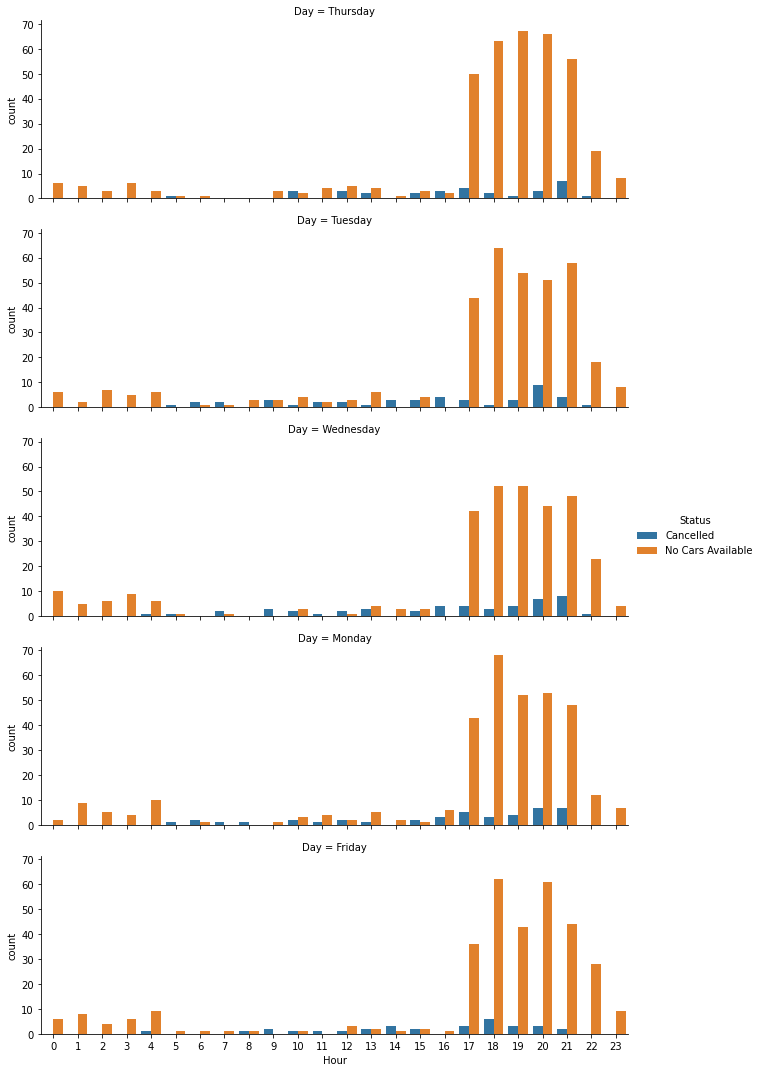

In [66]:
sns.factorplot(x = "Hour", hue = "Status", row = "Day", data = ip[(ip['Pickup point']=="Airport")&(ip['Status']!='Trip Completed')], kind = "count", size=3, aspect=3)
plt.show()

### Checking if the inference remains the same across all days for Pickup Point - City

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


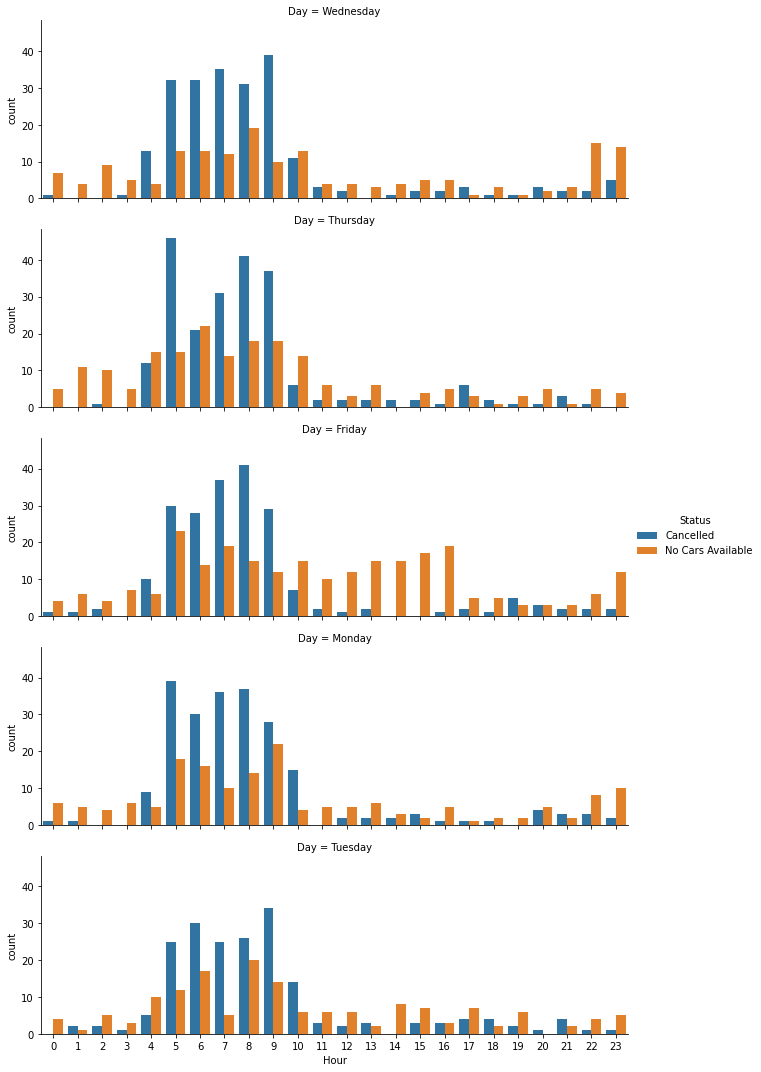

In [67]:
sns.factorplot(x = "Hour", hue = "Status", row = "Day", data = ip[(ip['Pickup point']=="City")&(ip['Status']!='Trip Completed')], kind = "count", size=3, aspect=3)
plt.show()

#### Inference: Yes, for City and Airport, the inference basis the timings remains same across all weekdays.

## Reasons for the supply demand gap - 
#### 1. Cities face maximum cancellation between 5AM - 10 AM. This could be since there's a huge rush for people going to work universities, etc. Thus, drivers might cancel for customers whose fare is comparatively greater
#### 2. From Airport, the maximum rush is usually at night, as people tend to travel after work, thus the issue persists during those times.

### Gap between Supply and Demand

In [74]:
# Total Trips Requested
print('Total Requested Trips : ')
req_trips = ip['Request id'].count()
print(req_trips)

# Completed Trips
print('Completed Trips : ')
print(ip[ip['Status']=='Trip Completed']['Request id'].count())

# Percent of Completed Trips
print('Completed Trip % : ')
print(round(100*ip[ip['Status']=='Trip Completed']['Request id'].count()/req_trips), '%')

# Count of Trip that did not happen
print('Trips that didn\'t happen : ')
print(ip[ip['Status']!='Trip Completed']['Request id'].count())

# Percent of Trip that did not happen
print('Percent of Trip that did not happen : ')
print(round(100*ip[ip['Status']!='Trip Completed']['Request id'].count()/req_trips), '%')

Total Requested Trips : 
6745
Completed Trips : 
2831
Completed Trip % : 
42 %
Trips that didn't happen : 
3914
Percent of Trip that did not happen : 
58 %


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


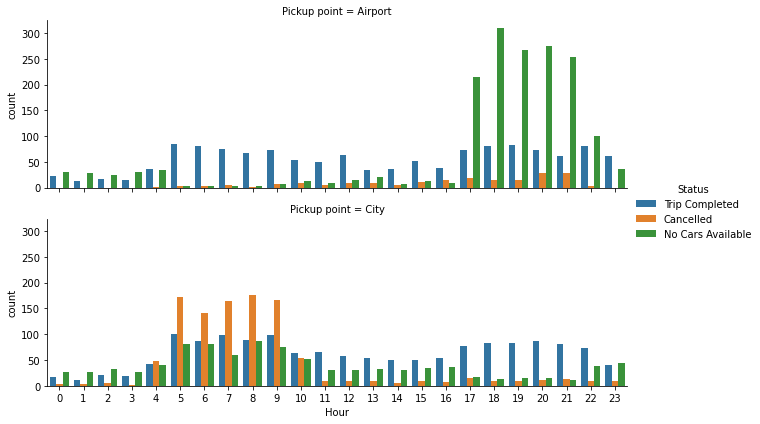

In [77]:
sns.factorplot(x = "Hour", hue = "Status", row = "Pickup point", data = ip, kind = "count", size=3, aspect=3)
plt.show()

### Inference from above plots:
#### 1. Demand on Airports is higher in the evening i.e. 5 PM - 10 PM
#### 2. Demand in Cities is higher in the morning i.e. 5 AM - 10 AM

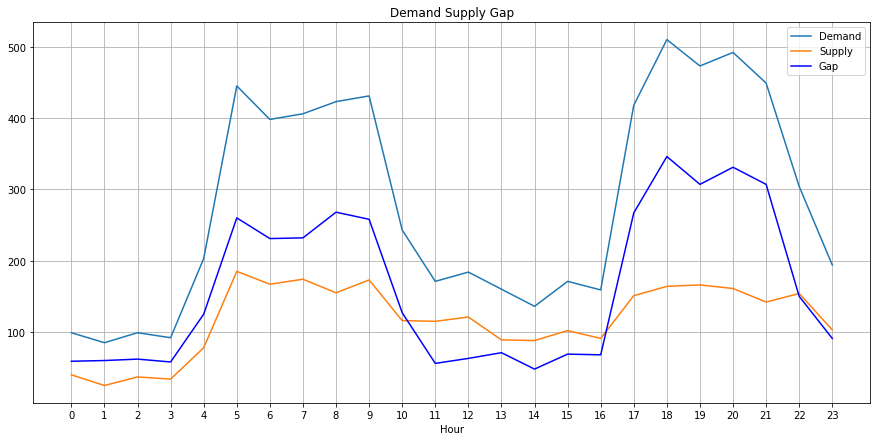

In [80]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
ip.groupby(ip['Hour']).count()['Request id'].plot(ax=ax, label='Demand')
ip[ip['Status']=="Trip Completed"].groupby(ip[ip['Status']=="Trip Completed"]['Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(ip.groupby(ip['Hour']).count()['Request id'] - ip[ip['Status']=="Trip Completed"].groupby(ip[ip['Status']=="Trip Completed"]['Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='blue')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()
plt.show()

### Plot show status count for each day

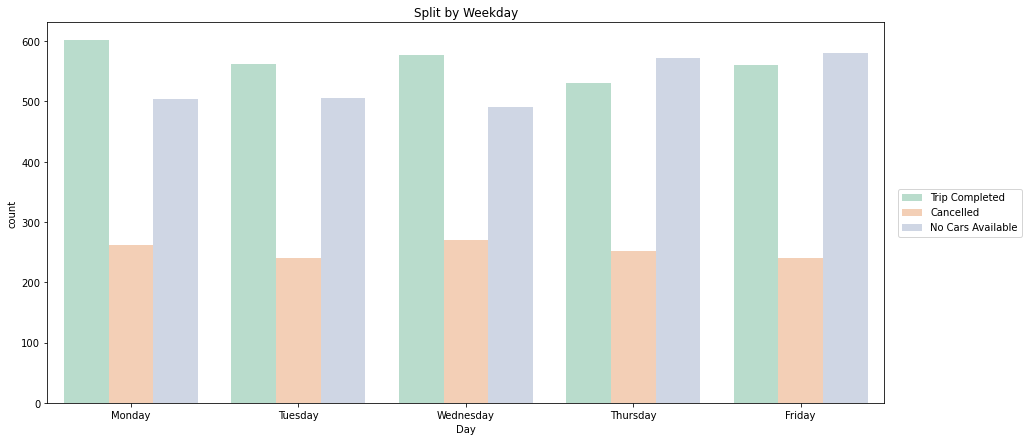

In [86]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Split by Weekday")
ax = sns.countplot(x='Day',hue='Status',data=ip, palette = 'Pastel2')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')
plt.show()

### Inference from above plot:
#### The count of trips completed, cancelled, cabs not available remains similar throughout the week

### -------------------------------------------------------------------------------------------------

### Pie Chart to show the status of Trips

In [113]:
def pie_chart(ip, title):
    labels = ip.index.values
    sizes = ip['Status'].values
    
    fig1, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title(title)
    plt.show()

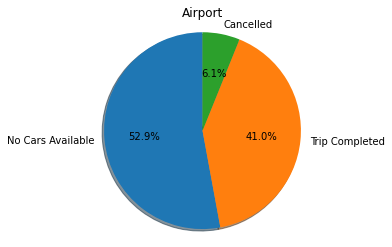

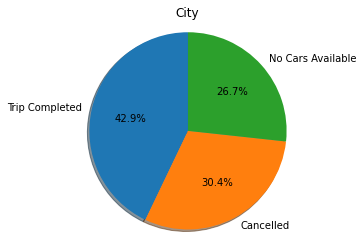

In [119]:
df_airport_count = pd.DataFrame(
    ip[(ip['Pickup point']=='Airport')]
    .Status.value_counts())
pie_chart(df_airport_count, "Airport")

df_city_count = pd.DataFrame(
    ip[(ip['Pickup point']=='City')]
    .Status.value_counts())
pie_chart(df_city_count, "City")


### Plotting Heatmap for hourly requests

In [87]:
ip1 = ip.groupby(['Day', 'Hour']).size().reset_index()
ip1.columns = ['Day', 'Hour', 'Hourly Count']
ip1.head()

,Day,Hour,Hourly Count
0,Friday,0,21
1,Friday,1,19
2,Friday,2,21
3,Friday,3,19
4,Friday,4,37


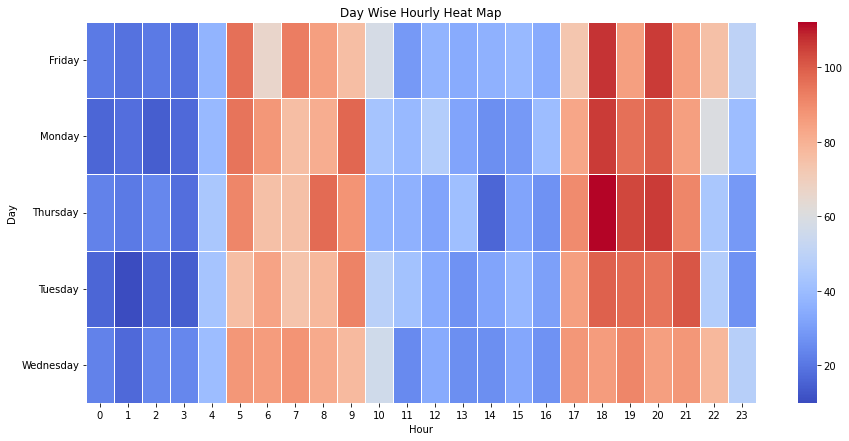

In [91]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Day Wise Hourly Heat Map')
sns.heatmap(ip1.pivot('Day', 'Hour', 'Hourly Count'), linewidths=1, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

## Analysing the Issue

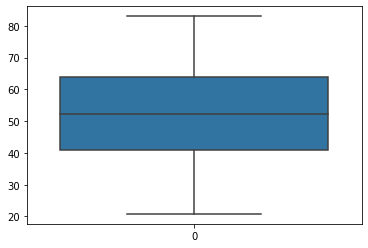

In [123]:
sns.boxplot(data=ip[(ip['Time Taken']>0)]['Time Taken'])
plt.show()

### Scatter plot of hour w.r.t. Duration

### 1. Identify if Traffic congestion is causing the gap

Airport


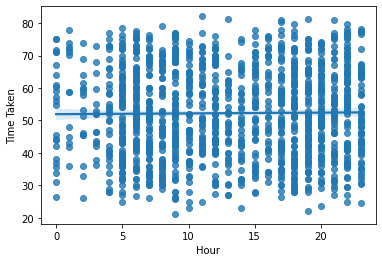

City


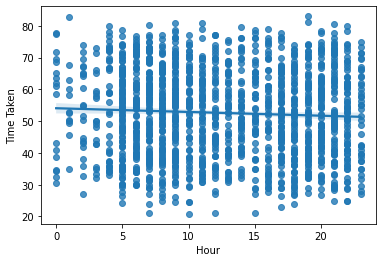

In [146]:
#Airport
print ('Airport')
sns.regplot(x = "Hour", y = "Time Taken", data =ip[(ip['Time Taken']>0)&(ip['Pickup point']=='Airport')])
plt.show()


# City
print('City')
sns.regplot(x = "Hour", y = "Time Taken", data = ip[(ip['Time Taken']>0)&(ip['Pickup point']=='City')])
plt.show()

### Inference from above plots:
#### Time taken to travel nearly remains the same for both the pickup points, thus traffic congestion is not the issue.

### 2. Driver waiting time

In [137]:
ip1 = ip.copy()
# Dropping rows with no driver id since those cannot be used for this analysis
ip1['Driver id'].dropna()

ip1 = ip1[ip1['Status']=='Trip Completed'].sort_values(by=['Driver id','Request timestamp'])
ip1['Wait Time'] = ip1['Request timestamp']-ip1['Drop timestamp'].shift()
ip1['Wait Time'] = round(ip1['Wait Time'].dt.total_seconds()/60,1)
ip1['Wait Time'].dropna()
ip1 = ip1[ip1['Wait Time']>0]
ip1 = ip1[ip1['Status']=='Trip Completed']
ip1.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time Taken,Slot,Request Date,Request Time,Drop Date,Drop Time,Day,Hour,Wait Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,Afternoon,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,297.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,Morning,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,870.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,Evening,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,670.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.5,Morning,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,630.3
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.5,Evening,2016-07-13,21:57:28,2016-07-13,22:28:59,Wednesday,21,751.7


In [138]:
ip1['Wait Time'].describe()

count    2531.000000
mean      646.388779
std       543.267221
min         2.000000
25%       247.350000
50%       508.300000
75%       862.950000
max      4794.400000
Name: Wait Time, dtype: float64

Airport


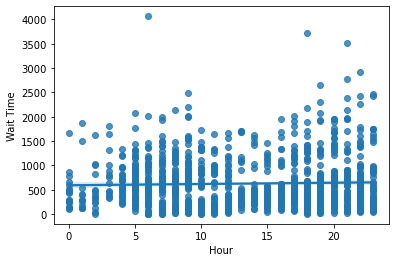

City


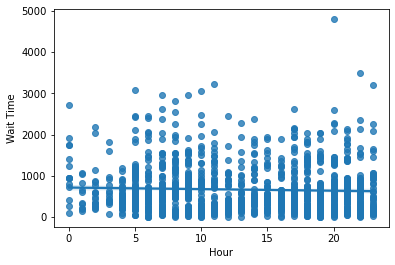

In [147]:
print('Airport')
sns.regplot(x = "Hour", y = "Wait Time", data = ip1[ip1['Pickup point']=='Airport'])
plt.show()

print('City')
sns.regplot(x = "Hour", y = "Wait Time", data = ip1[ip1['Pickup point']=='City'])
plt.show()

### Inference from above plots :
#### Waiting time at Airports is comparatively high during Early morning and Evening. Thus, this could be the cause of the huge number of cancellations and no cab availalbility
#### In Cities, mornings have the highest waiting time, as people might book cabs in advance and then the driver has to wait

## Suggested Solution: 

#### 1. Provide incentives to the drivers for the Waiting Time, such as gift vouchers
#### 2. Make a designated permanent cab parking at the Airport, so the cab would remain available at all times, bridging the no cabs available issue
#### 3. Airport Rides during early morning and late evenings - can charge comparatively high fares (Eg: 1.5x or 2x)
#### 4. Introduce monthly awards/ other incentives for drivers completing maximum no. of trips to/ from Airports during the early evening/ late night hours